In [1]:
# Load Libraries
import pandas as pd

# Read the dataset
df = pd.read_csv('Employee Attrition.csv')

# Display the first few rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
import numpy as np

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Identify missing values
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCu

In [4]:
# Remove duplicate rows
df_dedup = df.drop_duplicates()

# Replace specific values (example: replace abbreviations or standardize terms if applicable to your dataset)
# Update these replacements as per your dataset's requirements
df_replaced = df_dedup.replace({'Attrition': {'Yes': 1, 'No': 0}})

# Fill missing values with appropriate strategies
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Replace 'Age' with any numeric column in your dataset
df['JobRole'] = df['JobRole'].fillna(df['JobRole'].mode()[0])  # Replace 'JobRole' with any categorical column


<ipython-input-4-185398a506c2>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_replaced = df_dedup.replace({'Attrition': {'Yes': 1, 'No': 0}})


In [5]:
# Discretize 'MonthlyIncome' into bins
df['Income_bin'] = pd.cut(df['MonthlyIncome'], bins=3, labels=['Low', 'Medium', 'High'])

# Discretize 'MonthlyIncome' into quantile-based bins
df['Income_quantile'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Detect outliers using Z-score for a numeric column like 'MonthlyIncome'
df['z_score'] = (df['MonthlyIncome'] - df['MonthlyIncome'].mean()) / df['MonthlyIncome'].std()
outliers = df[np.abs(df['z_score']) > 3]


In [6]:
# Filter out outliers
df_filtered = df[np.abs(df['z_score']) <= 3]

# Detect outliers using IQR
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['MonthlyIncome'] < (Q1 - 1.5 * IQR)) | (df['MonthlyIncome'] > (Q3 + 1.5 * IQR))]

# Filter out outliers using IQR
df_filtered_iqr = df[~((df['MonthlyIncome'] < (Q1 - 1.5 * IQR)) | (df['MonthlyIncome'] > (Q3 + 1.5 * IQR)))]


Text(0, 0.5, 'Monthly Income')

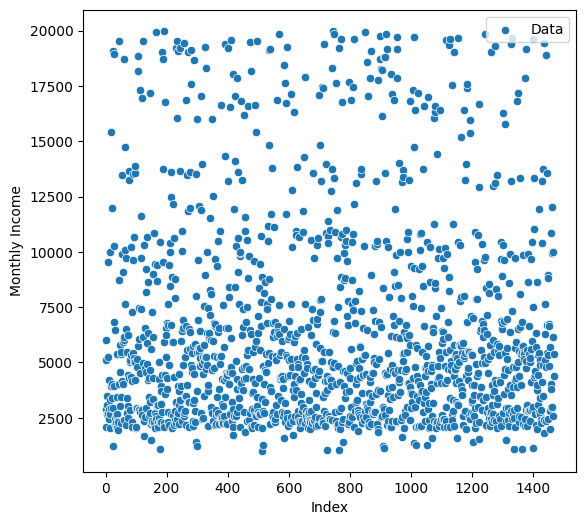

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(14, 6))

# Plot for Z-score method
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x=df.index, y='MonthlyIncome', label='Data')
sns.scatterplot(data=outliers, x=outliers.index, y='MonthlyIncome', color='red', label='Outliers')

plt.xlabel('Index')
plt.ylabel('Monthly Income')

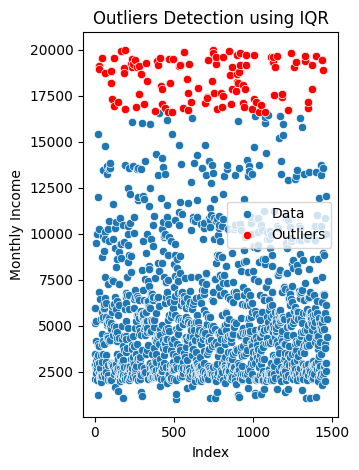

In [10]:
# Plot for IQR method
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x=df.index, y='MonthlyIncome', label='Data')
sns.scatterplot(data=outliers_iqr, x=outliers_iqr.index, y='MonthlyIncome', color='red', label='Outliers')
plt.title('Outliers Detection using IQR')
plt.xlabel('Index')
plt.ylabel('Monthly Income')

plt.tight_layout()
plt.show()


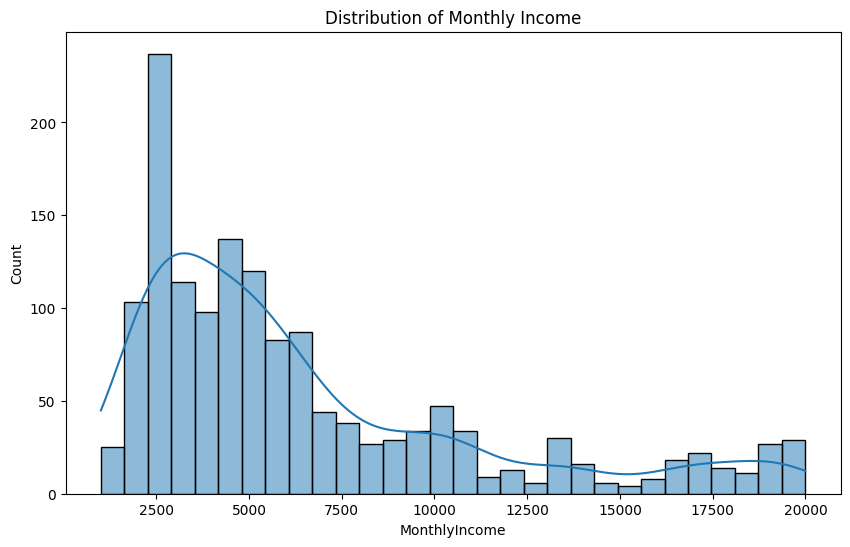

In [11]:
# Histogram for 'MonthlyIncome'
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True)
plt.title('Distribution of Monthly Income')
plt.show()

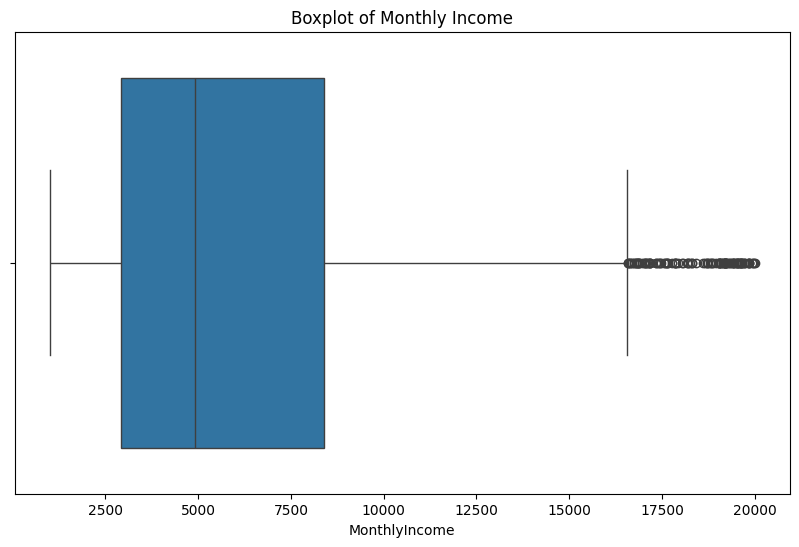

In [12]:
# Boxplot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MonthlyIncome'])
plt.title('Boxplot of Monthly Income')
plt.show()

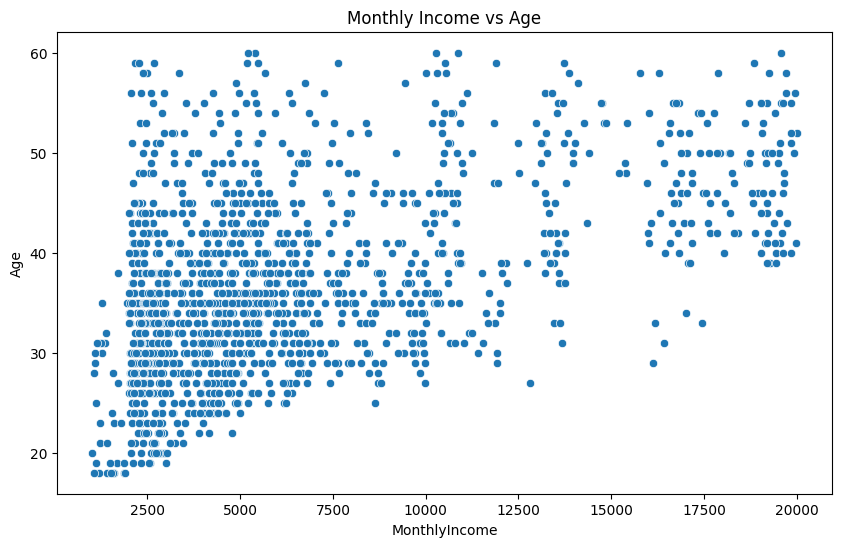

,,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Income_bin,Income_quantile,z_score
EmployeeNumber,JobRole,,,,,,,,,,,,,,,,,,,,,
1,Sales Executive,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,8,0,1,6,4,0,5,Low,Q3,-0.108313
2,Research Scientist,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,10,3,3,10,7,1,7,Low,Q3,-0.291619
4,Laboratory Technician,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,Low,Q1,-0.937335
5,Research Scientist,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,8,3,3,8,7,3,0,Low,Q1,-0.763374
7,Laboratory Technician,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,6,3,3,2,2,2,2,Low,Q2,-0.644639


In [14]:
# Scatter plot for 'MonthlyIncome' vs 'Age'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyIncome', y='Age', data=df)
plt.title('Monthly Income vs Age')
plt.show()

# Example of hierarchical indexing
df.set_index(['EmployeeNumber', 'JobRole'], inplace=True)
df.head()
